# This is a mobile sales EDA (Exploratory Data analysis) Project

In [1]:
# Imported a few important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Read the data from the excel file
df=pd.read_excel('mobile_sales.xlsx')

In [3]:
df.head(3)

,Mobile,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,percentage_discount
0,SAMSUNG GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,7.947998
1,Nokia 3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,NaN
2,realme C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,12.501563


In [4]:
df.shape

(3114, 9)

In [5]:
df.dtypes

Mobile                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
percentage_discount    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Mobile               3114 non-null   object 
 1   Colors               3114 non-null   object 
 2   Memory               3063 non-null   object 
 3   Storage              3070 non-null   object 
 4   Camera               3106 non-null   object 
 5   Rating               2968 non-null   float64
 6   Selling Price        3114 non-null   int64  
 7   Original Price       3114 non-null   int64  
 8   percentage_discount  1194 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 219.1+ KB


In [7]:
# It gives statistical info about numeric columns
df.describe()

,Rating,Selling Price,Original Price,percentage_discount
count,2968.000000,3114.000000,3114.000000,1194.000000
mean,4.243059,26436.625562,28333.473025,15.874587
std,0.272078,30066.892622,31525.599889,12.899142
min,2.300000,1000.000000,1000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,8.087248
50%,4.300000,15000.000000,16889.500000,13.636674
75%,4.400000,28999.000000,31500.000000,20.625933
max,5.000000,179900.000000,189999.000000,70.610305


## Eploratory Data Analysis

In [8]:
df.isnull().sum()

Mobile                    0
Colors                    0
Memory                   51
Storage                  44
Camera                    8
Rating                  146
Selling Price             0
Original Price            0
percentage_discount    1920
dtype: int64

In [9]:
# we are filling null values with 0
df['percentage_discount']=df['percentage_discount'].fillna(0)

In [10]:
df.isnull().sum()

Mobile                   0
Colors                   0
Memory                  51
Storage                 44
Camera                   8
Rating                 146
Selling Price            0
Original Price           0
percentage_discount      0
dtype: int64

In [11]:
# We used this condition to remove negative discounts
df=df[df['percentage_discount'] >= 0]

In [12]:
df.describe()

,Rating,Selling Price,Original Price,percentage_discount
count,2967.000000,3113.000000,3113.000000,3113.000000
mean,4.243040,26440.945069,28340.971731,6.140243
std,0.272122,30070.756659,31527.886940,10.700420
min,2.300000,1000.000000,1000.000000,0.000000
25%,4.100000,9990.000000,10121.000000,0.000000
50%,4.300000,15000.000000,16900.000000,0.000000
75%,4.400000,28999.000000,31500.000000,9.836388
max,5.000000,179900.000000,189999.000000,70.610305


In [13]:
df.shape

(3113, 9)

In [14]:
# we are filling null values with 0
df['Rating']=df['Rating'].fillna(0)

In [15]:
# we are filling null values with mode
df['Camera']=df['Camera'].fillna(df['Camera'].mode()[0])

In [16]:
# It help us to find duplicate records count
df[df.duplicated()].count() 

Mobile                 107
Colors                 107
Memory                 104
Storage                107
Camera                 107
Rating                 107
Selling Price          107
Original Price         107
percentage_discount    107
dtype: int64

In [17]:
# Dropping duplicate values
df=df.drop_duplicates()

In [18]:
df.isnull().sum()

Mobile                  0
Colors                  0
Memory                 48
Storage                44
Camera                  0
Rating                  0
Selling Price           0
Original Price          0
percentage_discount     0
dtype: int64

In [19]:
df.head(4)

,Mobile,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,percentage_discount
0,SAMSUNG GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,7.947998
1,Nokia 3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0.000000
2,realme C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,12.501563
3,Infinix Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,0.000000


In [20]:
# we are filling null values with mode
df['Memory']=df['Memory'].fillna(df['Memory'].mode()[0])
df['Storage']=df['Storage'].fillna(df['Storage'].mode()[0])

In [21]:
# Changing the data type of percentage_discount column int to float.
df['percentage_discount']=df['percentage_discount'].astype('float')

In [22]:
df.isnull().sum()

Mobile                 0
Colors                 0
Memory                 0
Storage                0
Camera                 0
Rating                 0
Selling Price          0
Original Price         0
percentage_discount    0
dtype: int64

#### Feature Engineering

In [23]:
df.head(3)

,Mobile,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,percentage_discount
0,SAMSUNG GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,7.947998
1,Nokia 3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0.000000
2,realme C2,Diamond Black,2 GB,64 GB,Yes,4.4,6999,7999,12.501563


In [24]:
# we are creating a new column named Brands
def brands(s):
    return s.strip().split(' ')[0]

df['Brands']=df['Mobile'].apply(brands)

In [25]:
# we are creating a new column named Model
def model(s):
    model1 =s.strip().split(' ')[1:]
    return ' '.join(model1)

df['Models']=df['Mobile'].apply(model)


In [26]:
# Changed '4GB' to '4 GB' in Memory column
def change(m):
    if m == '4GB':
      return '4 GB'
    else:
        return m
df['Memory']=df['Memory'].apply(change)

In [27]:
df.shape

(3006, 11)

In [28]:
df.head(5)

,Mobile,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,percentage_discount,Brands,Models
0,SAMSUNG GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,7.947998,SAMSUNG,GALAXY M31S
1,Nokia 3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,0.000000,Nokia,3.2
2,realme C2,Diamond Black,2 GB,64 GB,Yes,4.4,6999,7999,12.501563,realme,C2
3,Infinix Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,0.000000,Infinix,Note 5
4,Apple iPhone 11,Black,4 GB,64 GB,Yes,4.6,49900,49900,0.000000,Apple,iPhone 11


In [29]:
# calculating discount 
df['Discount']=(df['percentage_discount']*df['Original Price'])/100

In [30]:
df.dtypes

Mobile                  object
Colors                  object
Memory                  object
Storage                 object
Camera                  object
Rating                 float64
Selling Price            int64
Original Price           int64
percentage_discount    float64
Brands                  object
Models                  object
Discount               float64
dtype: object

<Axes: >

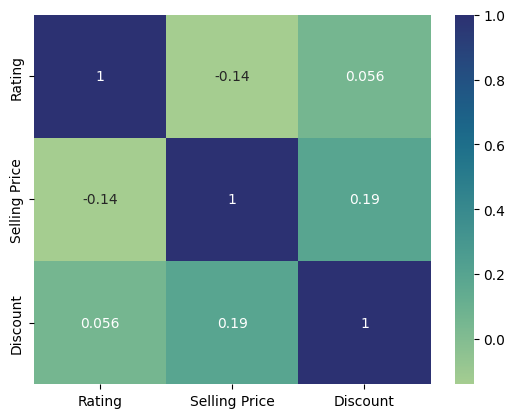

In [42]:
# Creating heatmap to find out relation between variables
numeric_crr=df[['Rating','Selling Price','Discount']].corr()
sns.heatmap(numeric_crr,annot=True,cmap='crest')

## Univariant Analysis

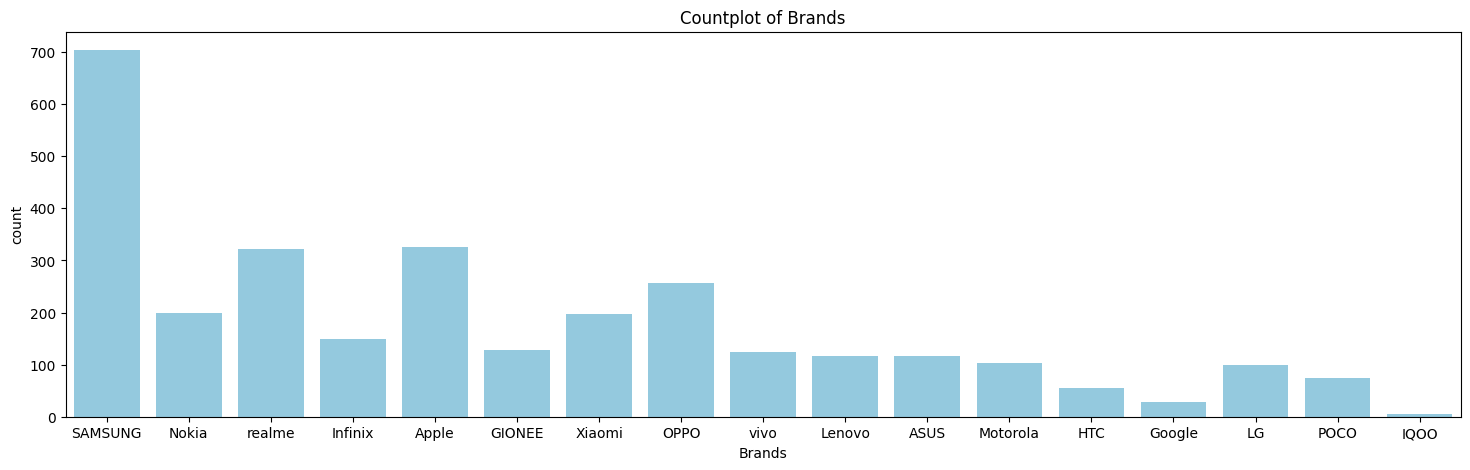

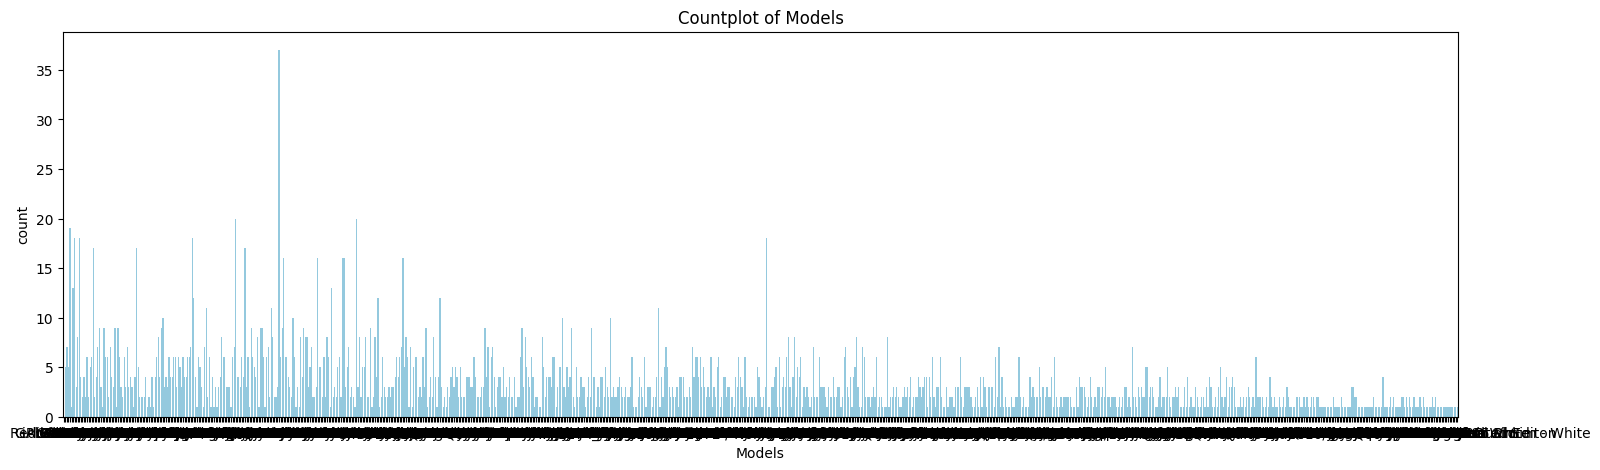

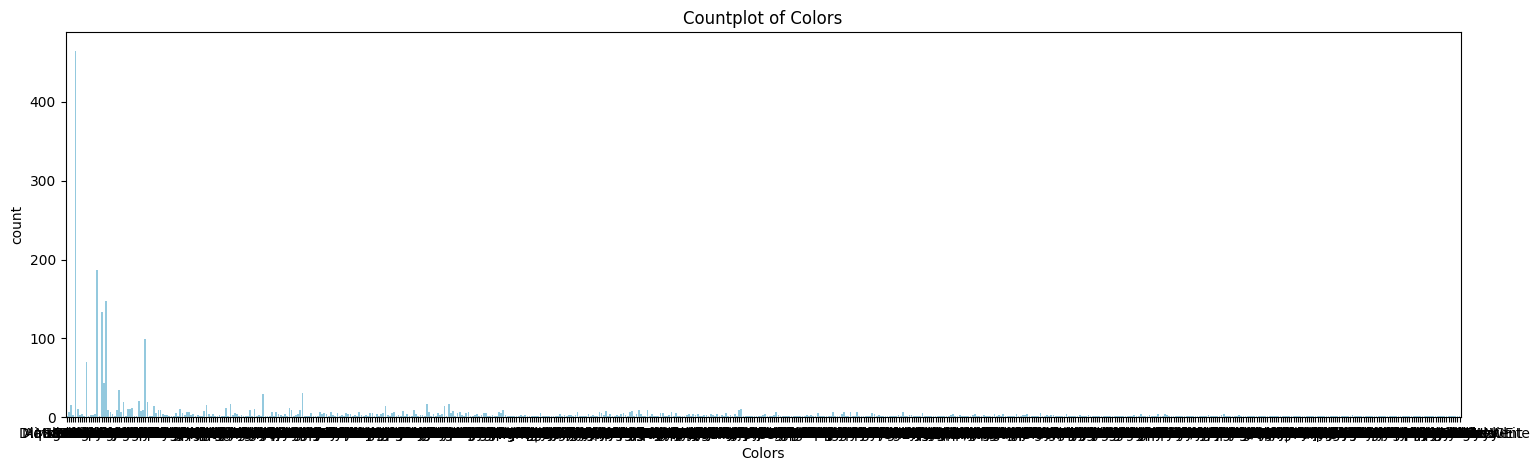

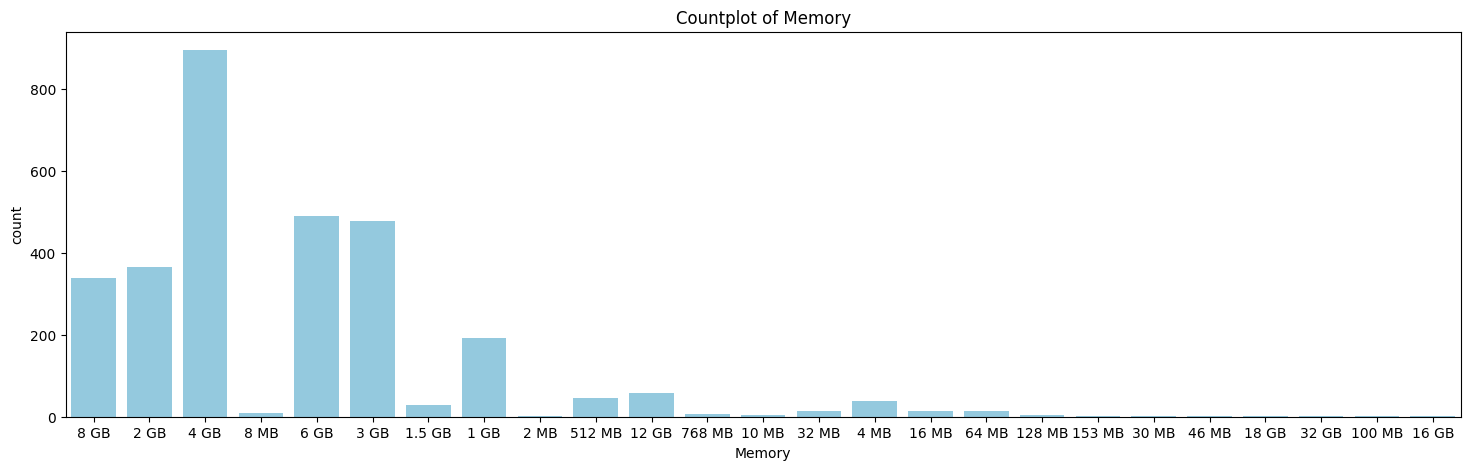

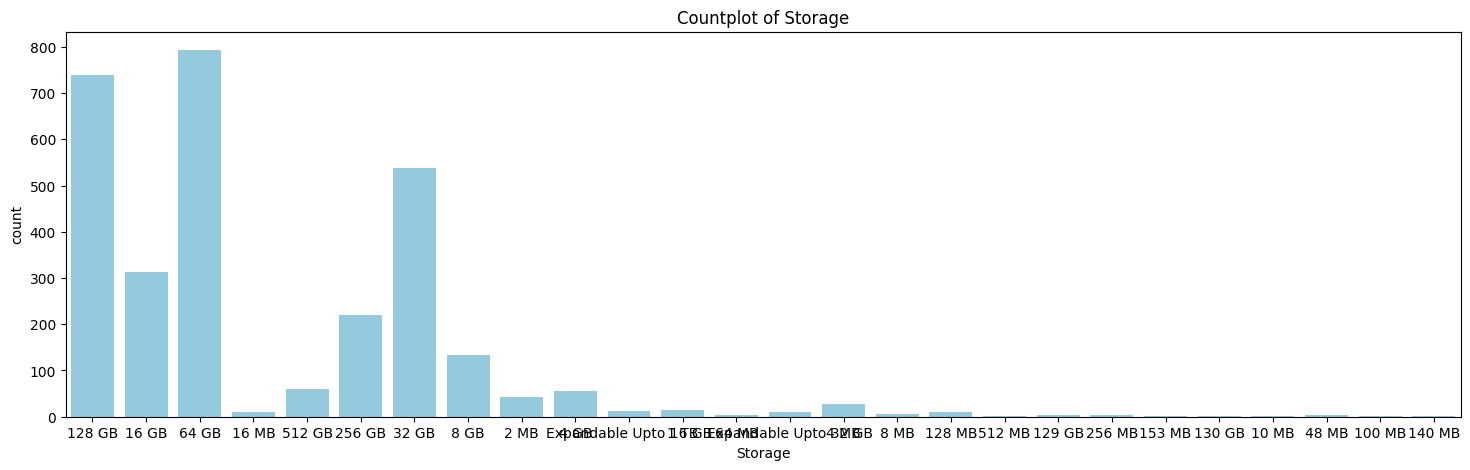

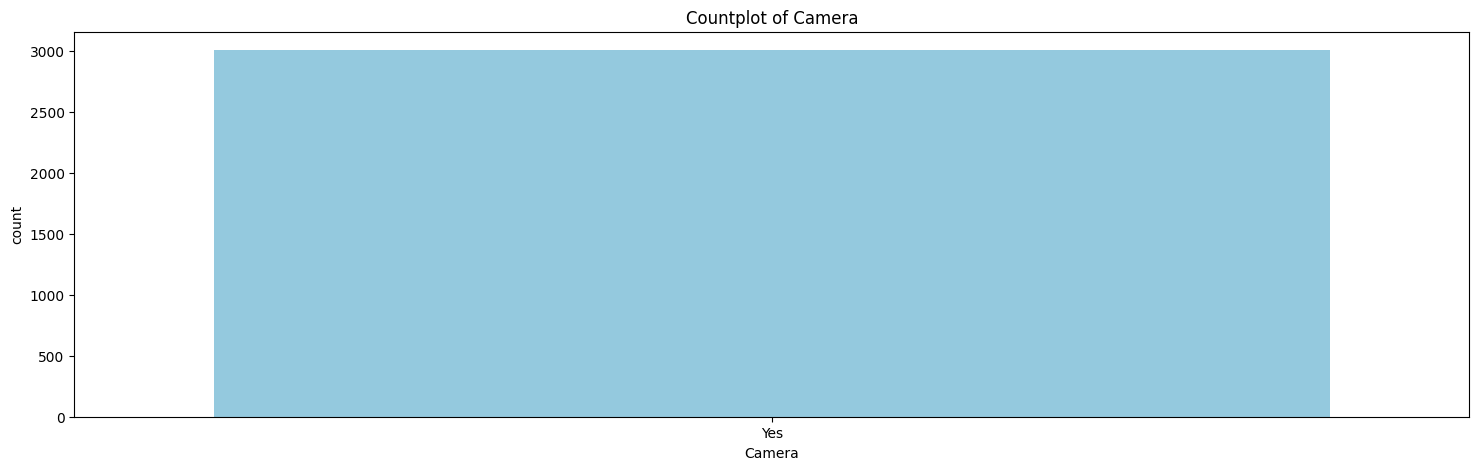

In [32]:
# Categorical columns
categorical_cols=df[['Brands','Models','Colors','Memory', 'Storage', 'Camera']]
for i, predictor in enumerate(categorical_cols):
    plt.figure(i, figsize=(18, 5))
    sns.countplot(data=categorical_cols,x=predictor,color='skyblue')
    plt.title(f"Countplot of {predictor}")
    plt.show()

### Insights
- **Samsung** appears to be the most preferred brand, with over **700** phones sold, making it the leading choice among customers.
- Phones with **4 GB** memory are the most popular, with more than **800** customers choosing devices in this category.

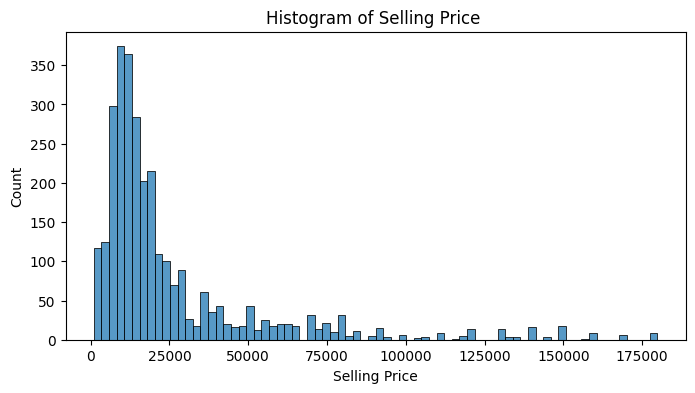

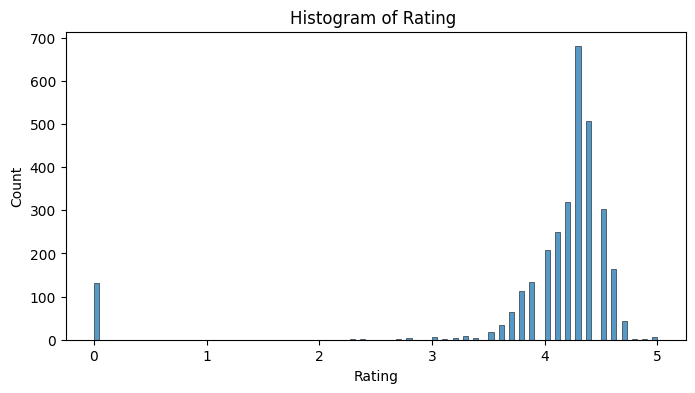

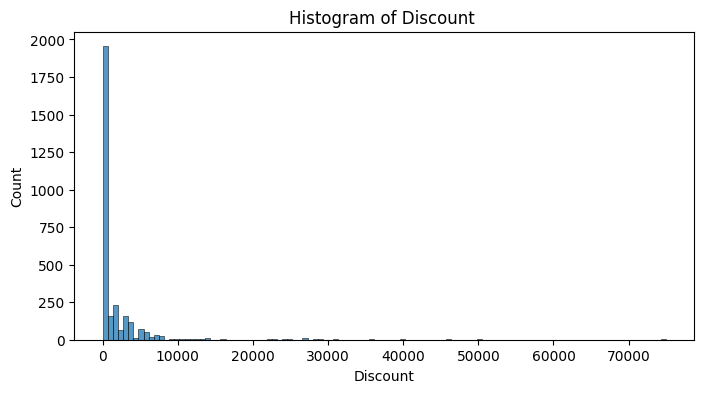

In [33]:
# Numeric columns
numerical_cols=df[['Selling Price','Rating','Discount']]
for col in numerical_cols: 
    plt.figure(figsize=(8,4))
    sns.histplot(df[col])
    plt.title(f"Histogram of {col} ")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

## Bivariant Analysis

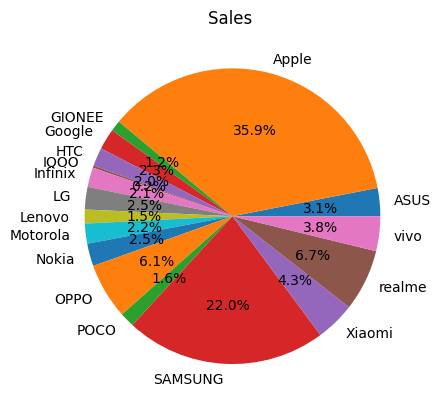

In [34]:
# Sales by Brands 
total_sales=df.groupby('Brands')['Selling Price'].sum().reset_index()
plt.pie(total_sales['Selling Price'],labels=total_sales['Brands'],autopct="%1.1f%%")
plt.title('Sales ')
plt.show()

#### Analysis
- Top three Brands
  - Apple (**35.9%** sales of entire sales)
  - Samusung (**22%** sales of entire sales)
  - Realme (**6.7%** sales of entire sales)
----------------------------------------------------------
- Bottom three Brands
  - IQOO (**0.2%** sales of entire sales)
  - GIONEE (**1.2%** sales of entire sales)
  - Lenovo (**1.5%** sales of entire sales)

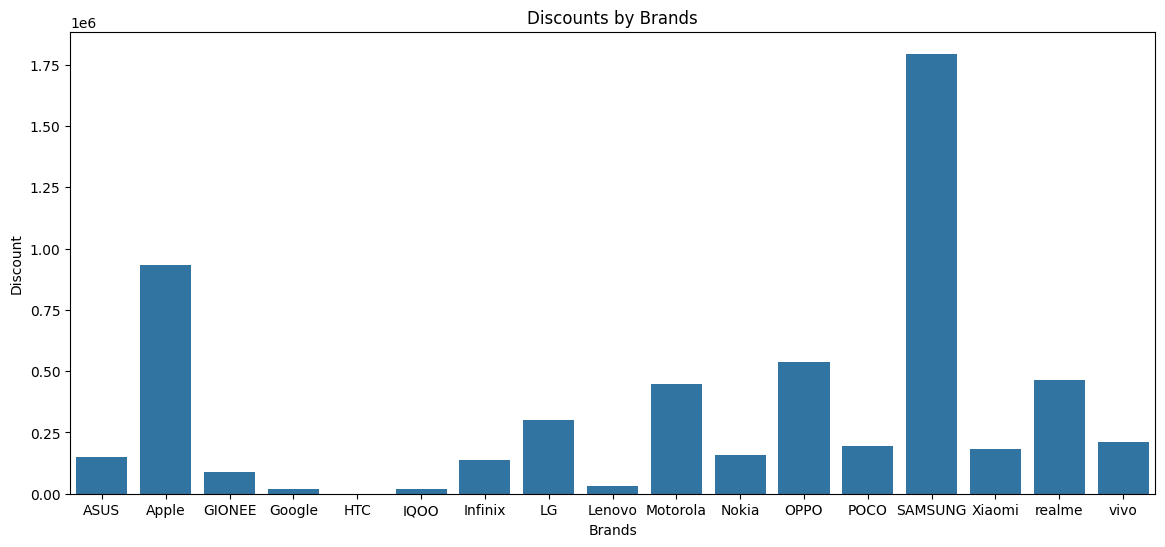

In [35]:
# Discount by Brands
Total_discount=df.groupby('Brands')['Discount'].sum().reset_index()
plt.figure(figsize=(14,6))
sns.barplot(x='Brands', y='Discount', data=Total_discount)
plt.title('Discounts by Brands')
plt.show()


#### Analysis 
- There are few brands where discount has given  more as compare to other brands. Here are below those brands
  - SAMSUNG (More than 1.75 million)
  - Apple
  - Oppo
  - Realme
- There are few brands where discount has given  less as compare to other brands. Here are below those brands:
  - HTC
  - Google
  - IQOO
  - LENOVO

In [36]:
df.columns

Index(['Mobile', 'Colors', 'Memory', 'Storage', 'Camera', 'Rating',
       'Selling Price', 'Original Price', 'percentage_discount', 'Brands',
       'Models', 'Discount'],
      dtype='object')

In [37]:
# Top five mobiles by Rating
top_Mobiles=df[df['Rating'] == 5.0][['Mobile','Rating']]
top_Mobiles

,Mobile,Rating
247,vivo X50,5.0
1446,vivo Z1x,5.0
1655,vivo X60 Pro,5.0
2242,SAMSUNG SM-B310EZDDINS,5.0
2483,Apple iPhone 7 Plus,5.0
2879,vivo S2,5.0


#### There are only six mobile phones those got 5 out of 5 ratings
   - vivo X50
   - vivo Z1x
   - vivo X60 Pro
   - SAMSUNG SM-B310EZDDINS
   - Apple iPhone 7 Plus
   - vivo S2
----------
If you see above products then you will see that four of them belong to Vivo brand and rest of them Apple and SAMSUNG.
We can say that customers like vivo's phones more as compare to other brands.

In [40]:
# Average discount by brands 
total_dis=df.groupby('Brands')['Discount'].sum().reset_index()
count_mo=df.groupby('Brands')['Models'].count().reset_index()
df1=pd.merge(total_dis,count_mo,on='Brands')
df1['avg_dicount']=df1['Discount']/df1['Models']

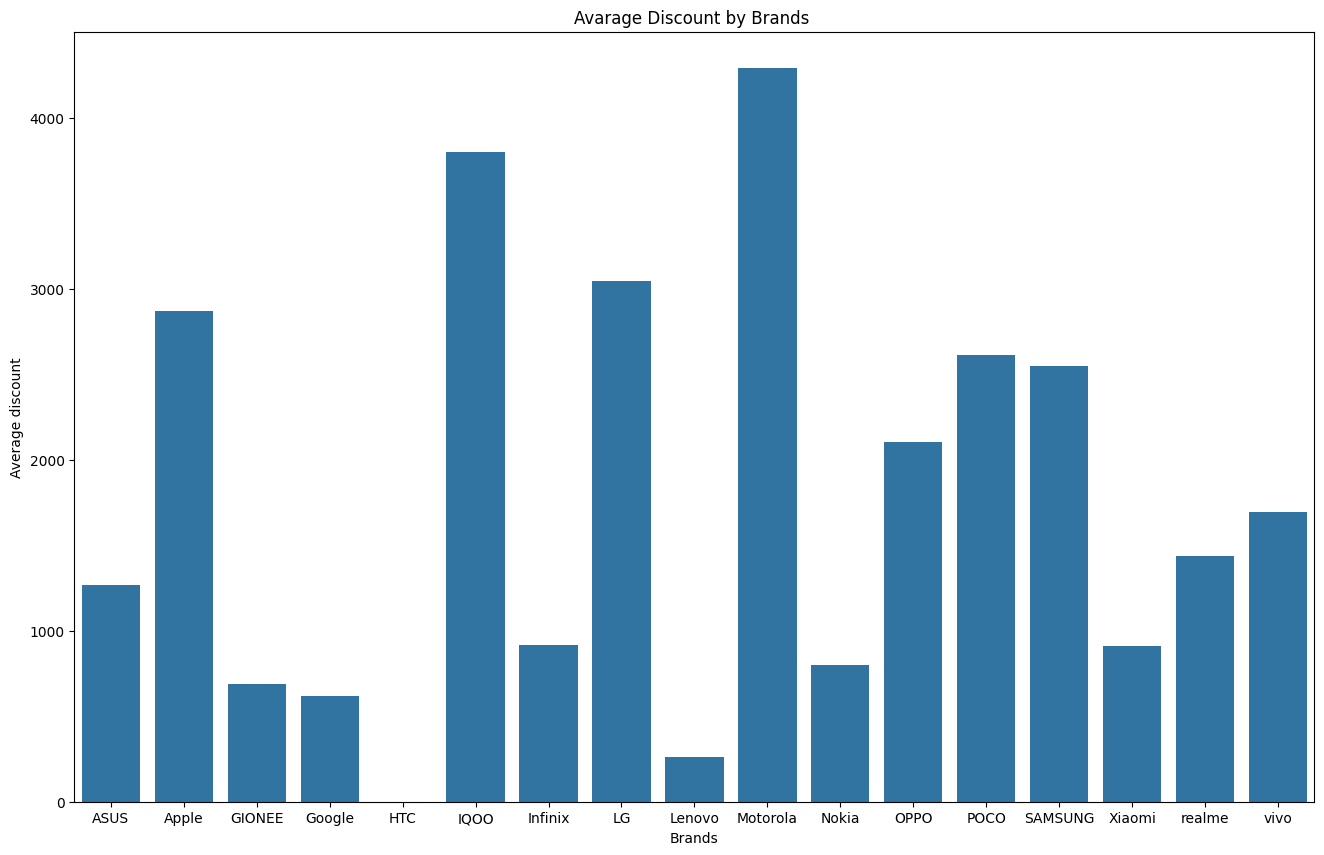

In [41]:
plt.figure(figsize=(16,10))
sns.barplot(x='Brands',y='avg_dicount',data=df1)
plt.title('Avarage Discount by Brands ')
plt.xlabel('Brands')
plt.ylabel('Average discount')
plt.show()

#### Analysis 
- There are three top Brands where you get average discount more than 3000:
  - Motorola
  - IQOO
  - LG
- There are three top Brands:
  - HTC
  - Lenovo
  - Google
-----------

#### Recommendations
- Business should give discounts on brands, such as IQOO, HTC, etc. This will help businesses to increase their sales of        those products.
- There are a few models where very few sales occurred such as IQOO, GIONEE and Lenovo. To achieve this, we will need to create      offers that help brands increase sales.